# Module 1: Exercise A

In this project, we will focus on exploratory data analysis of body fat levels.

Let's first load all libraries or packages needed:

In [1]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Read the Data

>__Task 1__
>
>- Import the data file "bodyfat_data.csv"
>- Check metadata using `info()`

In [2]:
bodyfat = pd.read_csv('bodyfat_data.csv')
bodyfat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       281 non-null    int64  
 1   Density  281 non-null    float64
 2   BodyFat  281 non-null    float64
 3   Age      275 non-null    float64
 4   Weight   281 non-null    float64
 5   Height   281 non-null    float64
 6   Neck     281 non-null    float64
 7   Chest    281 non-null    float64
 8   Abdomen  281 non-null    float64
 9   Hip      281 non-null    float64
 10  Thigh    281 non-null    float64
 11  Knee     281 non-null    float64
 12  Ankle    281 non-null    float64
 13  Biceps   281 non-null    float64
 14  Forearm  281 non-null    float64
 15  Wrist    281 non-null    float64
 16  Gender   281 non-null    object 
 17  Year     281 non-null    int64  
 18  Month    281 non-null    int64  
 19  Day      281 non-null    int64  
dtypes: float64(15), int64(4), object(1)
memory usage: 44.0

>__Task 2__
>
>Check the top 10 rows of the data frame

In [3]:
bodyfat.head(10)

,id,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Gender,Year,Month,Day
0,0,1.0708,12.3,23.0,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,Male,2013,3,7
1,1,1.0853,6.1,22.0,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,Female,2013,4,16
2,2,1.0414,25.3,22.0,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,Female,2013,1,23
3,3,1.0751,10.4,26.0,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,Female,2013,2,9
4,4,1.0340,28.7,24.0,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,Female,2013,9,25
5,5,1.0502,20.9,24.0,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8,Female,2012,2,17
6,6,1.0549,19.2,26.0,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7,Male,2012,11,7
7,7,1.0704,12.4,25.0,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8,Female,2012,7,17
8,8,1.0900,4.1,25.0,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2,Female,2012,3,17
9,9,1.0722,11.7,23.0,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2,Male,2013,8,26


Do you know which columns contain date information? The first three columns (i.e., __Year__, __Month__, __Day__) are integers, shown as `int64` from the metadata above.

>__Task 3__
>
>- Combine and convert these three columns to a __date__ column, which contains `datetime` type
>- Confirm the result by printing its data type

In [4]:
bodyfat['date'] = pd.to_datetime(bodyfat[['Year', 'Month', 'Day']])

# Call the column to see results
bodyfat['date']

,date
0,2013-03-07
1,2013-04-16
2,2013-01-23
3,2013-02-09
4,2013-09-25
...,...
276,2013-09-12
277,2013-11-19
278,2013-01-03
279,2013-01-07


In [5]:
# Print data type
print(type(bodyfat['date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Now, let's look at the column __Gender__ and check the unique values and counts.

>__Task 4__
>
>Generate unique values and counts in __Gender__

In [6]:
print(bodyfat['Gender'].value_counts())

Gender
Female    149
Male      129
Other       3
Name: count, dtype: int64


## Data Cleansing

What is the timeframe of data collection? We can print its minimum and maximum values:

In [7]:
print(bodyfat['date'].min(), bodyfat['date'].max())

2012-01-01 00:00:00 2013-12-26 00:00:00


Now, we want to find out if there's any missing values in the data.

>__Task 5__
>
>- Find the number of missing values in each column
>- Retrieve rows with missing values

In [8]:
# Find the number of missing values in columns
print(bodyfat.isnull().sum())

id         0
Density    0
BodyFat    0
Age        6
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
Gender     0
Year       0
Month      0
Day        0
date       0
dtype: int64


In [9]:
# Retrieve missing values in rows
bodyfat[bodyfat.isnull().any(axis=1)]

,id,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,...,Knee,Ankle,Biceps,Forearm,Wrist,Gender,Year,Month,Day,date
60,60,1.0396,26.1,NaN,216.00,73.25,41.4,112.3,104.8,103.1,...,40.9,23.1,36.2,31.8,20.2,Female,2012,3,22,2012-03-22
65,65,1.0313,30.0,NaN,183.50,67.50,40.9,103.0,100.3,104.2,...,40.2,22.7,34.8,30.1,18.7,Female,2012,9,4,2012-09-04
82,82,1.0568,18.4,NaN,190.25,72.75,39.3,103.1,97.8,99.6,...,39.0,23.0,34.3,29.6,19.0,Male,2013,4,18,2013-04-18
138,138,1.0481,22.4,NaN,168.25,71.25,34.3,98.3,88.5,98.3,...,38.4,22.5,31.7,27.4,17.6,Female,2012,7,14,2012-07-14
179,179,1.0603,16.9,NaN,234.75,74.50,42.8,109.5,104.5,109.9,...,43.1,25.8,39.1,32.5,19.9,Male,2013,1,22,2013-01-22
268,60,1.0396,26.1,NaN,216.00,73.25,41.4,112.3,104.8,103.1,...,40.9,23.1,36.2,31.8,20.2,Female,2012,3,22,2012-03-22


Looks like some records have missing age info.

>__Task 6__
>
>Handle missing values (What is your suggestion?)

In [10]:
# Drop rows having null values
bodyfat = bodyfat.dropna()

In [11]:
# Retrieve missing values in rows again to double check the result
bodyfat[bodyfat.isnull().any(axis=1)]

,id,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,...,Knee,Ankle,Biceps,Forearm,Wrist,Gender,Year,Month,Day,date


Also, we want to find out if there's any duplicated values. Note that this data set has an __id__ column. So, we can rely on this column, but be cautious to check the duplicated rows.

>__Task 7__
>
>Check if there is any duplicates in the data set and identify if further action is needed

In [12]:
bodyfat[bodyfat.duplicated()].sort_values(by='id')
bodyfat.drop_duplicates(inplace=True)
bodyfat[bodyfat.duplicated()].sort_values(by='id')

,id,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,...,Knee,Ankle,Biceps,Forearm,Wrist,Gender,Year,Month,Day,date


## Data Analysis and Preprocessing

Let's explore the data more. We will dive into a few attributes.

>__Task 8__
>
>- Check the min, max, and average values of the __Age__ column
>- Find out how many data points are in each __Gender__ group

In [13]:
# Check values
print(bodyfat['Age'].min(), bodyfat['Age'].max(), bodyfat['Age'].mean())

22.0 81.0 44.74089068825911


In [14]:
# Count data points
print(bodyfat['Gender'].value_counts())

Gender
Female    130
Male      114
Other       3
Name: count, dtype: int64


>__Task 9__
>
>- The __Gender__ column has a categorical variable. Is it ordinal or nominal?
>- Convert it to numerical data and add prefix `Gender` to the new columns

In [15]:
# Count values
print(bodyfat['Gender'].value_counts())

Gender
Female    130
Male      114
Other       3
Name: count, dtype: int64


This is an nominal variable. The suitable method is one-hot encoding method. One-hot encoding may also be applicable to some machine learning algorithms.

In [16]:
# Convert values
bodyfat = pd.get_dummies(bodyfat, columns=['Gender'], prefix='Gender')
bodyfat.head()

,id,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,...,Biceps,Forearm,Wrist,Year,Month,Day,date,Gender_Female,Gender_Male,Gender_Other
0,0,1.0708,12.3,23.0,154.25,67.75,36.2,93.1,85.2,94.5,...,32.0,27.4,17.1,2013,3,7,2013-03-07,False,True,False
1,1,1.0853,6.1,22.0,173.25,72.25,38.5,93.6,83.0,98.7,...,30.5,28.9,18.2,2013,4,16,2013-04-16,True,False,False
2,2,1.0414,25.3,22.0,154.00,66.25,34.0,95.8,87.9,99.2,...,28.8,25.2,16.6,2013,1,23,2013-01-23,True,False,False
3,3,1.0751,10.4,26.0,184.75,72.25,37.4,101.8,86.4,101.2,...,32.4,29.4,18.2,2013,2,9,2013-02-09,True,False,False
4,4,1.0340,28.7,24.0,184.25,71.25,34.4,97.3,100.0,101.9,...,32.2,27.7,17.7,2013,9,25,2013-09-25,True,False,False


>__Task 10__
>
>- Check the min and max values of __Height__
>- Identify the rows with min and max values of the column

In [17]:
print(bodyfat['Height'].min(), bodyfat['Height'].max())

29.5 77.75


In [18]:
# Identify the rows with min value
bodyfat[bodyfat['Height'] == bodyfat['Height'].min()]

,id,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,...,Biceps,Forearm,Wrist,Year,Month,Day,date,Gender_Female,Gender_Male,Gender_Other
41,41,1.025,32.9,44.0,205.0,29.5,36.6,106.0,104.3,115.5,...,33.6,28.7,17.4,2013,10,20,2013-10-20,False,True,False


In [19]:
# Identify the rows with max value
bodyfat[bodyfat['Height'] == bodyfat['Height'].max()]

,id,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,...,Biceps,Forearm,Wrist,Year,Month,Day,date,Gender_Female,Gender_Male,Gender_Other
95,95,1.0991,17.4,53.0,224.5,77.75,41.1,113.2,99.2,107.5,...,32.9,30.8,20.4,2012,1,20,2012-01-20,False,False,True


Next, we want to find if there's any outliers using the rule `mean+-3*sd` and common sense.

>__Task 11__
>
>Retrieve rows where values are outliers in the __weight__ column
>
>- Find the the max, mean, and min of the column
>- Create a mask for values less than `mean-3*sd` and greater than `mean+3*sd`
>- Use the mask to filter the rows. Do you recommend to replace the outliers?

In [20]:
# Find the min, max, mean
weight_min = bodyfat['Weight'].min()
weight_max = bodyfat['Weight'].max()
weight_mean = bodyfat['Weight'].mean()
weight_sd = bodyfat['Weight'].std()
print(weight_min, weight_max, weight_mean)

118.5 363.15 178.52712550607285


In [21]:
# Create a mask and filter the rows
weight_mask = (bodyfat['Weight'] < weight_mean - 3*weight_sd) | (bodyfat['Weight'] > weight_mean + 3*weight_sd)
bodyfat[weight_mask]

,id,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,...,Biceps,Forearm,Wrist,Year,Month,Day,date,Gender_Female,Gender_Male,Gender_Other
38,38,1.0202,35.2,46.0,363.15,72.25,51.2,136.2,148.1,147.7,...,45.0,29.0,21.4,2013,5,17,2013-05-17,True,False,False


As the dataset contains body measure, it is expected to see some outliers in terms of weight or other indicators. Unless the number exceeds the possibility of the human body weight, no need to drop or replace the outliers.

>__Task 12__
>
>Retrieve rows where values are outliers in the __BodyFat__ column
>
>- Find the the max, mean, and min of the column. What do you find? Any outliers or values that seems unusual?
>- What do you recommend to handle the outlier(s)? Execute your recommendation.

In [22]:
# Find the min, max, mean
bodyfat_min = bodyfat['BodyFat'].min()
bodyfat_max = bodyfat['BodyFat'].max()
bodyfat_mean = bodyfat['BodyFat'].mean()
bodyfat_sd = bodyfat['BodyFat'].std()
print(bodyfat_min, bodyfat_max, bodyfat_mean, bodyfat_sd)
bodyfat_mask = (bodyfat['BodyFat'] < bodyfat_mean - 3*bodyfat_sd) | (bodyfat['BodyFat'] > bodyfat_mean + 3*bodyfat_sd)
bodyfat[bodyfat_mask]

0.0 47.5 19.077732793522262 8.409123851185132


,id,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,...,Biceps,Forearm,Wrist,Year,Month,Day,date,Gender_Female,Gender_Male,Gender_Other
215,215,0.995,47.5,51.0,219.0,64.0,41.2,119.8,122.1,112.8,...,34.7,29.1,18.4,2012,12,26,2012-12-26,False,True,False


In [23]:
# Let's drop the outlier
bodyfat = bodyfat.drop(bodyfat[bodyfat_mask].index)

In [24]:
bodyfat.columns

Index(['id', 'Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'Year', 'Month', 'Day', 'date', 'Gender_Female', 'Gender_Male',
       'Gender_Other'],
      dtype='object')

>__Task 13__
>
>Split the data set into 80% train set and 20% test set. Use `random_state=123` for replication purpose
>
>- The target variable is __BodyFat__
>- The feature columns are __Density__, __Age__, __Weight__, __Height__, __Neck__, __Chest__, __Abdomen__, __Hip__, __Thigh__, __Knee__, __Ankle__, __Biceps__, __Forearm__, __Wrist__, and two gender columns that you have converted.

In [25]:
from sklearn.model_selection import train_test_split

# Define feature columns and target variable
feature_cols = ['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'Gender_Female', 'Gender_Male', 'Gender_Other']
target_col = 'BodyFat'

X = bodyfat[feature_cols]
y = bodyfat[target_col]

# Split the data into 80% train and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (196, 17)
Shape of X_test: (50, 17)
Shape of y_train: (196,)
Shape of y_test: (50,)


>__Task 14__
>
>- Fit `MinMaxScaler` to scale all `X` columns between 0 and 1. Do you need to scale the encoded categorical variables?
>- Implement the scaler to both train and test sets from the above task, and save to `X_train_scaled` and `X_test_scaled`

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit(X_train)

In [27]:
# Transform both train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Visualization

Let's first use pandas default histogram method to plot distributions.

>__Task 15__
>
>Plot distributions for __Weight__ and __Height__ separately, setting transparency to 50%

<Axes: >

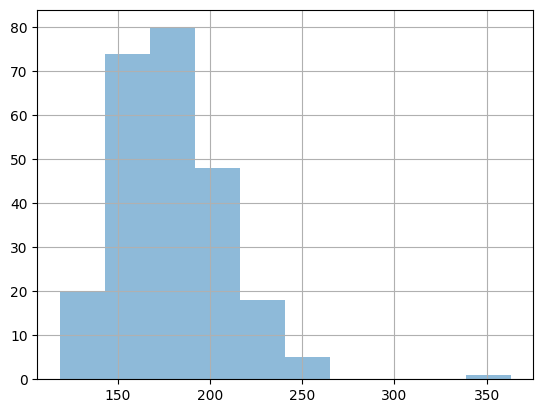

In [28]:
# Plot for Weight
bodyfat['Weight'].hist(alpha=0.5)

<Axes: >

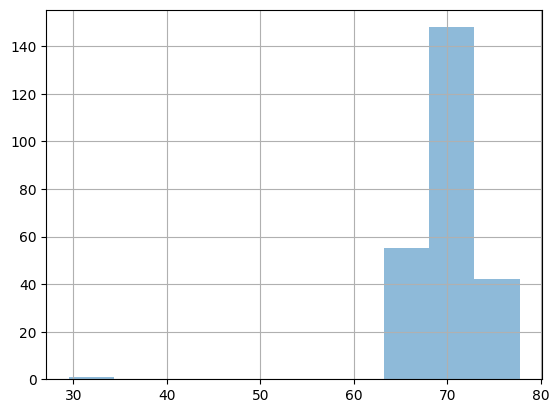

In [29]:
# Plot for Height
bodyfat['Height'].hist(alpha=0.5)

Then, we use seaborn pairplot method to compare different attributes. Do you think any features are highly related?  

>__Task 16__
>
>Create a pairplot using seaborn to compare the following features:
>
>__BodyFat__, __Age__, __Weight__, __Height__, __Neck__, __Chest__, __Abdomen__, __Hip__, __Thigh__

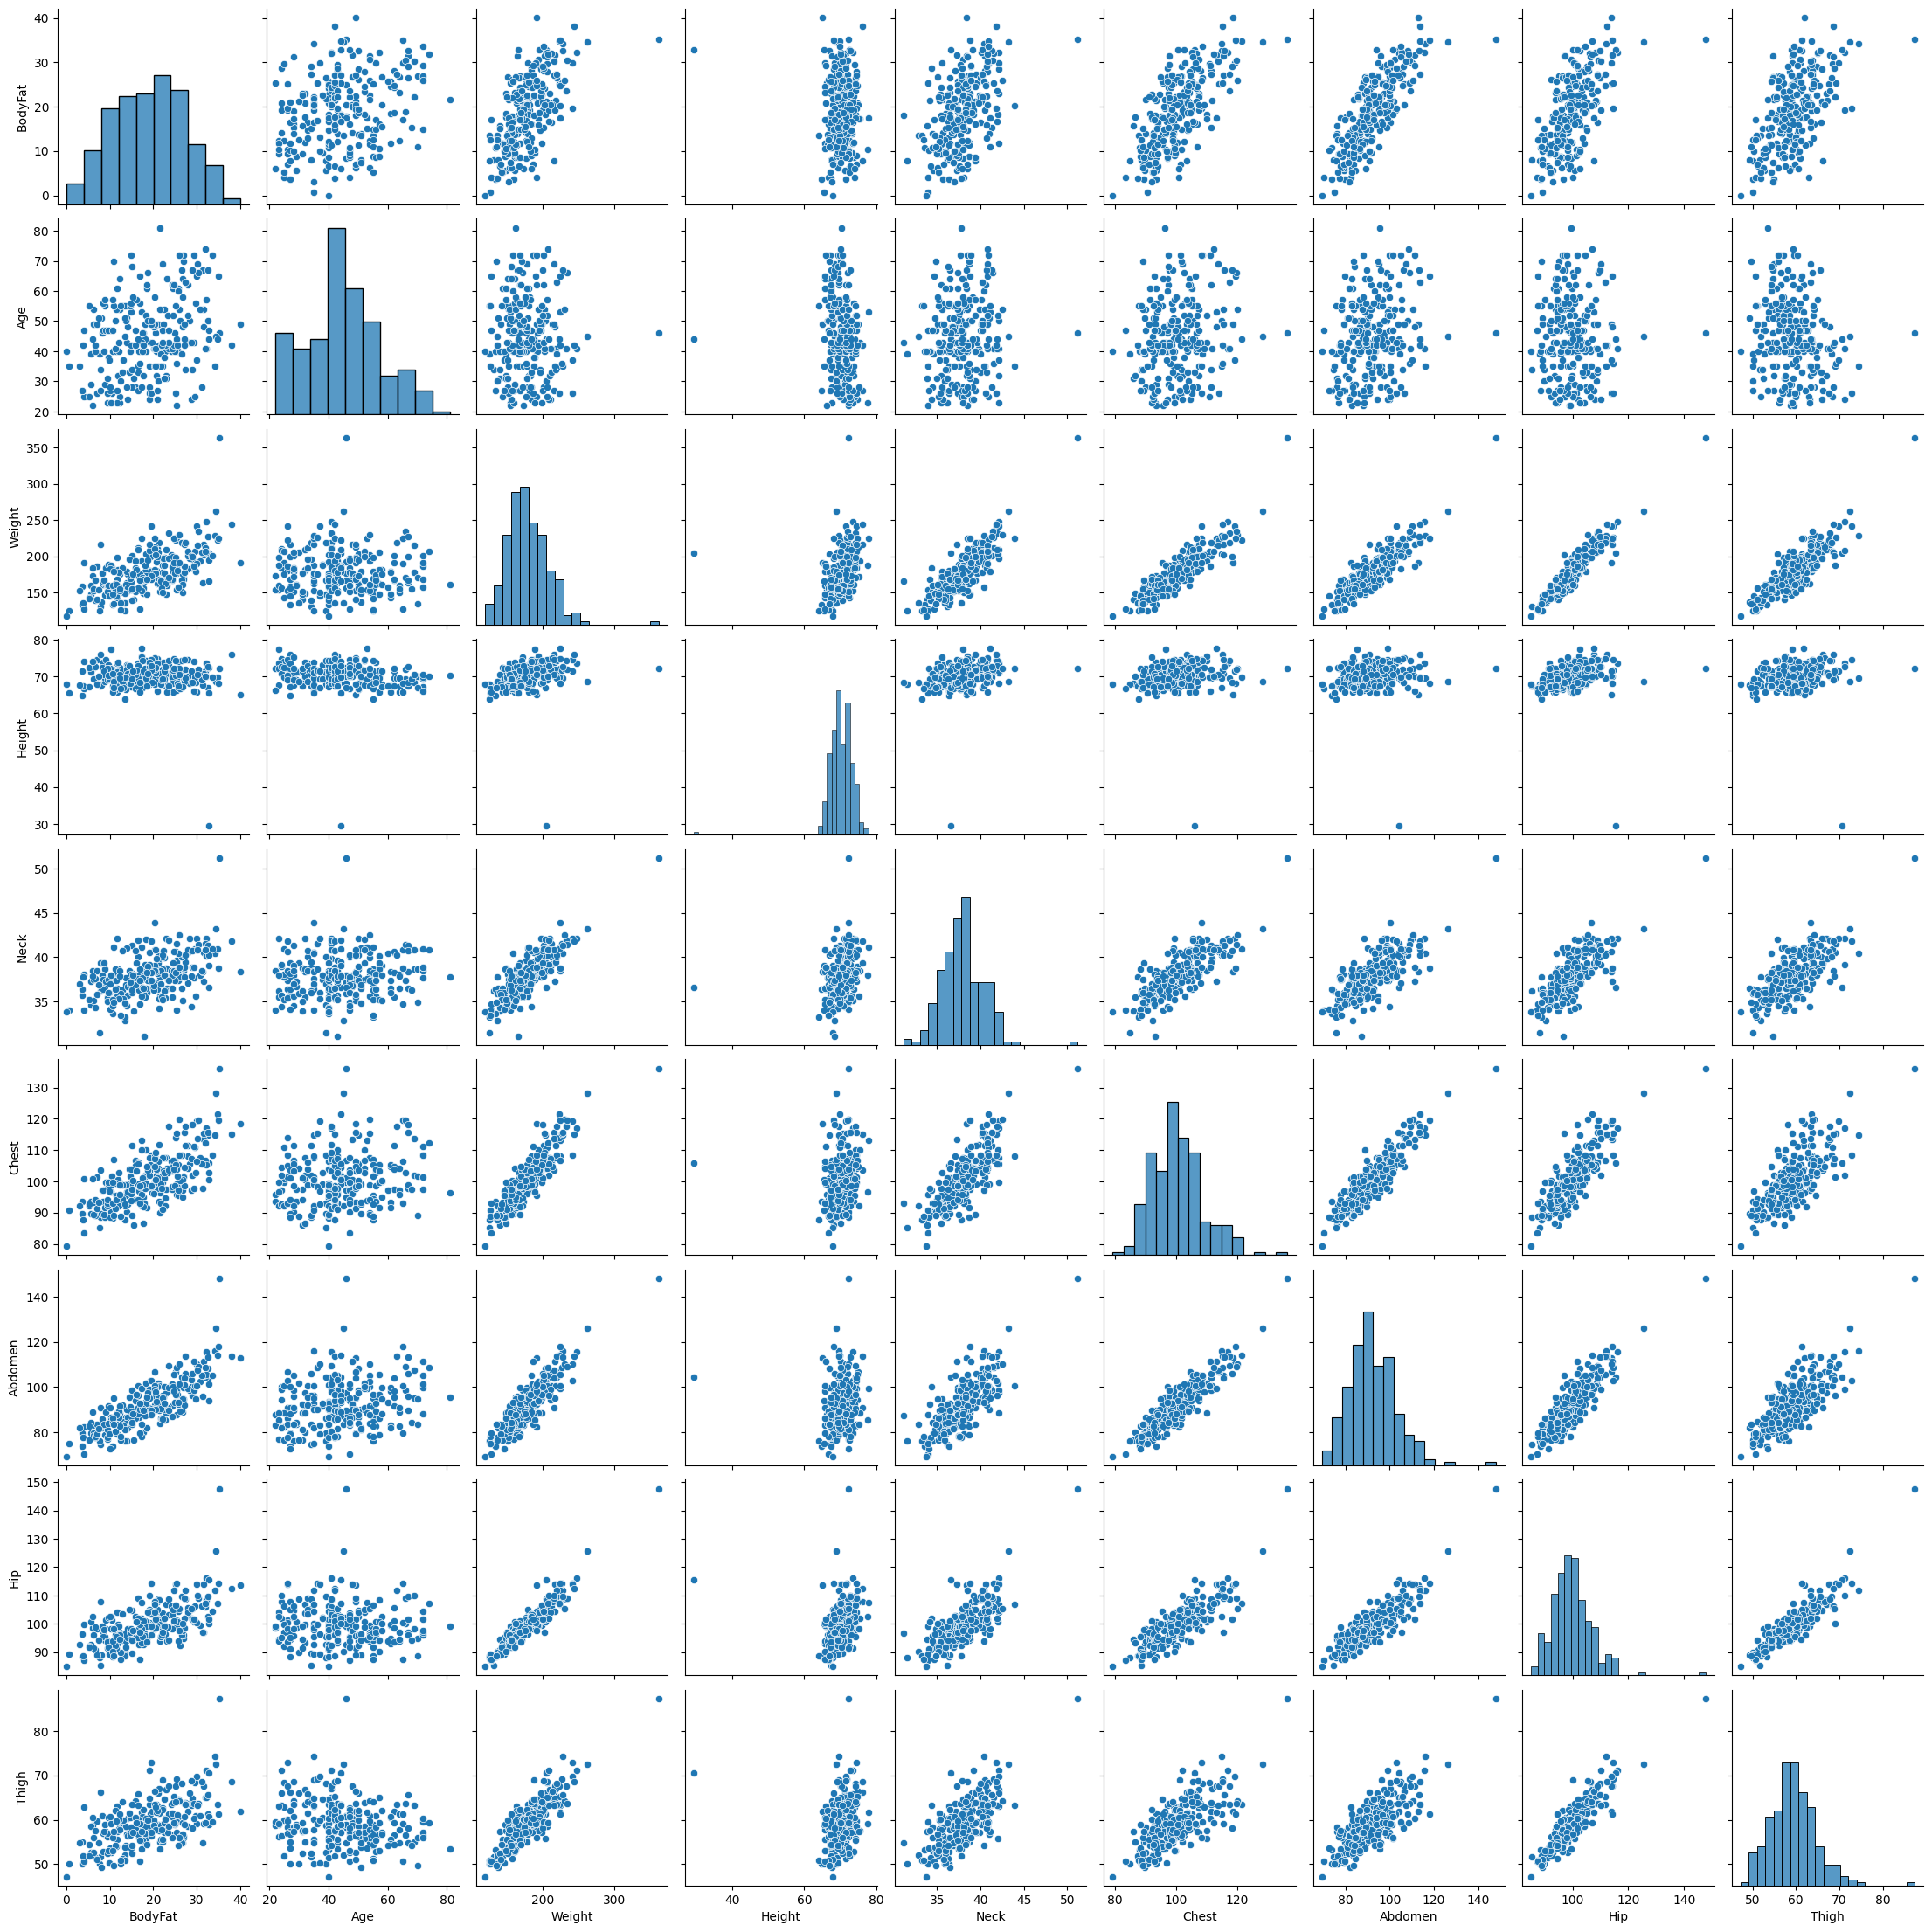

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features for the pairplot
features_for_pairplot = ['BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh']

# Create the pairplot
sns.pairplot(bodyfat[features_for_pairplot])
plt.show()

There are a few columns that seem to have positive relationships with the target variable __BodyFat__. Let's check whether any of the features has visible correlation with the target variable.

>__Task 17__
>
>Using pandas built-in function, create a single scatter plot to show the join distribution of __BodyFat__ and __Weight__

array([[<Axes: xlabel='BodyFat', ylabel='BodyFat'>,
        <Axes: xlabel='Weight', ylabel='BodyFat'>],
       [<Axes: xlabel='BodyFat', ylabel='Weight'>,
        <Axes: xlabel='Weight', ylabel='Weight'>]], dtype=object)

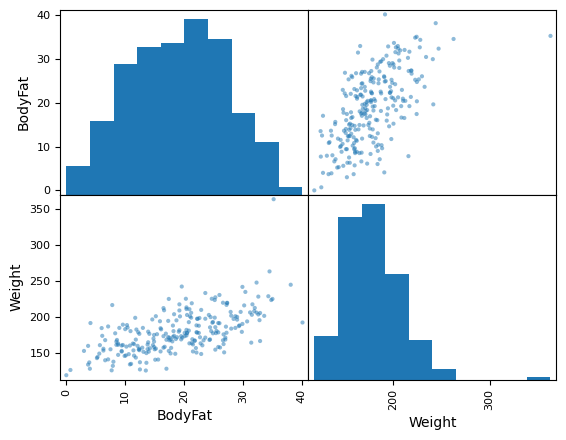

In [34]:
pd.plotting.scatter_matrix(bodyfat[['BodyFat', 'Weight']])

>__Task 18__
>
>Create a heatmap of correlation between the features in `X_train`
>
>- Get the correlation matrix of all the columns in `X_train` using `.corr()` method
>- Plot a heatmap of the correlation matrix using `seaborn.heatmap` module
>     - Set colormap to `coolwarm`
>     - Set formatting string to `.2f`

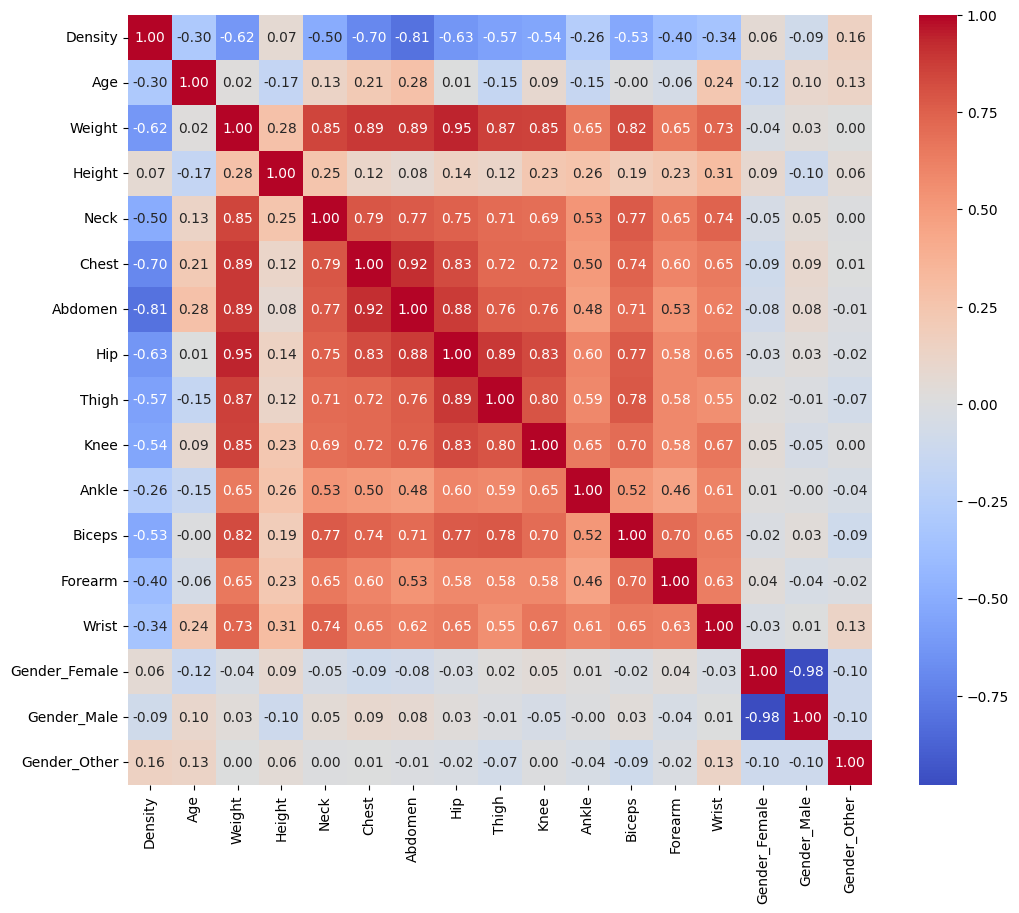

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the correlation matrix
corr_matrix = X_train.corr()

# Set the figure size
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

Looks like the body parts measurements are positively correlated, and density is negatively correlated with body measures.